In [1]:
import os

os.getcwd()

'C:\\Users\\Mukund Kathait\\Downloads'

A CNN scans the image based on its kernel size i.e. the size of the frame which we specify and in the first pass tries to find some features like edges, corners etc.
Next it slides the kernel over the next set of pixels and does this for the entire image.
Later, after completing the CONVOLUTION, we perform a pooling on matrix of features. The most common one is MAXpooling, wherein we selet the max value.


In [2]:
os.chdir('C:\\Users\\Mukund Kathait\\Downloads\\10-class-for-car-logo\\TrainingData')

In [3]:
from tqdm import tqdm
import cv2
import numpy as np


In [15]:
#making false since we have a numpy object
REBUILD_DATA = True 
# set to true to one once, then back to false unless you want to change something in your training data.

class Cars():
    IMG_SIZE = 50
    Honda = "TrainingData/Honda"
    VW = "TrainingData/VW"
    Buick = "TrainingData/Buick"
    Citroen  = "TrainingData/Citroen"
    Lexus = "TrainingData/Lexus"
    Toyota = "TrainingData/Toyota"
    Mazda = "TrainingData/Mazda"
    Chery = "TrainingData/Chery"
    
#     TESTING = "PetImages/Testing"
    LABELS = { Buick: 0, Citroen: 1, VW: 2, Chery: 3,
             Lexus: 4, Toyota: 5, Mazda: 6, Honda: 7  }
    training_data = []

    honda_count = 0
    vw_count = 0
    buick_count = 0
    citroen_count = 0
    lexus_count = 0
    toyota_count = 0
    mazda_count = 0
    chery_count = 0

    def make_training_data(self):
        #iterate over the dict
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        #np.eye(8)[self.LABELS[label]] --> contains the label
                        #8 since we have 8 classes
                        [0,1,0,0,0,0,0,]
                        self.training_data.append([np.array(img), np.eye(8)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
#all the classes should have equal distribution
                        if label == self.Honda:
                            self.honda_count += 1
                        elif label == self.VW:
                            self.vw_count += 1
                        elif label == self.Buick:
                            self.buick_count += 1
                        elif label == self.Citroen:
                            self.citroen_count += 1
                        elif label == self.Lexus:
                            self.lexus_count += 1
                        elif label == self.Toyota:
                            self.toyota_count += 1
                        elif label == self.Mazda:
                            self.mazda_count += 1
                        elif label == self.Chery:
                            self.chery_count += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Honda: ',self.honda_count)
        print('VW: ',self.vw_count)
        print('Buick: ',self.buick_count)
        print('Citroen: ',self.citroen_count)
        print('Lexus: ',self.lexus_count)
        print('Toyota: ',self.toyota_count)
        print('Mazda: ',self.mazda_count)
        print('Chery: ',self.chery_count)
        

if REBUILD_DATA:
    car = Cars()
    car.make_training_data()

TrainingData/Buick


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 230.92it/s]


TrainingData/Citroen


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.83it/s]


TrainingData/VW


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 259.46it/s]


TrainingData/Chery


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.52it/s]


TrainingData/Lexus


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 221.76it/s]


TrainingData/Toyota


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 247.42it/s]


TrainingData/Mazda


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 203.92it/s]


TrainingData/Honda


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.63it/s]


Honda:  1000
VW:  1000
Buick:  1000
Citroen:  1000
Lexus:  1000
Toyota:  1000
Mazda:  1000
Chery:  1000


In [16]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [17]:
len(training_data)

8000

In [34]:
training_data[0]

array([array([[249, 249, 248, ..., 248, 249, 250],
       [253, 253, 253, ..., 255, 254, 254],
       [227, 225, 223, ..., 229, 229, 230],
       ...,
       [245, 246, 247, ..., 249, 252, 249],
       [246, 247, 247, ..., 246, 250, 248],
       [249, 249, 248, ..., 242, 246, 247]], dtype=uint8),
       array([0., 1., 0., 0., 0., 0., 0., 0.])], dtype=object)

In [30]:
training_data[2][1]

array([0., 0., 0., 0., 0., 1., 0., 0.])

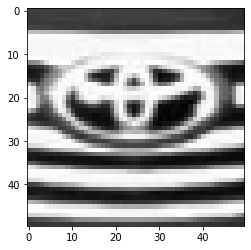

In [31]:
import matplotlib.pyplot as plt

plt.imshow(training_data[2][0],cmap='gray')

In [47]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
# #         nn.Conv2d(input is 1, 32 is the convulution features
# #                  and 5 is the kernel size)
#         self.conv1 = nn.Conv2d(1,32,5)
#         self.conv2 = nn.Conv2d(32,64,5)
#         self.conv3 = nn.Conv2d(64,128,5)
        
# #Since there is no way to flatten the data,
# #we pass fake data and figure out whats the shape
# #not clearly given in pytorch documents
# #x = torch.randn(50,50).view(-1(how so many features we have),[1,50,50]-->tensor)
#         x = torch.randn(50,50).view(-1,1,50,50)
#         self._to_linear = None
# #Part of forward method but not whole
#         self.convs(x)
#         self.fc1 = nn.Linear(self._to_linear,512)
#         self.fc2 = nn.Linear(512,2)
        
#     def convs(self,x):
#         x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
#         x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
#         x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        
#         print(x[0].shape)       
        
        
#         if self._to_linear is None:
#       #X is coming in as a batch of data ex.(3,5,5)      
#             self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
#             return x
        
#     def forward(self,x):
#         x = self.convs(x)
#         #Here after passing fake data, we come to know
#         #the size required for input
#         x = x.view(-1,self._to_linear)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
        
#         return F.softmax(x,dim=1)
        
        
# net = Net()




import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 8) # 512 in, 8 out bc we're doing 8 classes

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=8, bias=True)
)


In [48]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
#To scale the images
X = X/255.0

y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)


In [49]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

7200
800


In [50]:
# BATCH_SIZE = 100

# EPOCHS = 1

# for epoch in range(EPOCHS):
#     for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
#         batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
#         batch_y = train_y[i:i+BATCH_SIZE]
# #if you have multiple optimizers, use this        
# #         optimizer.zero_grad()
        
#     #For entire network zero the gradients
#         net.zero_grad()
#         outputs = net(batch_X)
        
#         loss = loss_function(outputs, batch_y)
#         loss.backward()
#         optimizer.steop()
        
# print(loss)
        
    
BATCH_SIZE = 50
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")

100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [00:56<00:00,  2.50it/s]


Epoch: 0. Loss: 0.00852588564157486


In [51]:
correct = 0
total = 0

#We have net.eval, net.train

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        
        if predicted_class == real_class:
            correct += 1
            
        total += 1
        
print("Accuracy : ", round(correct/total,3))

        

100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:07<00:00, 108.56it/s]


Accuracy :  0.941


In [52]:
torch.cuda.is_available()

True

In [53]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [54]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU")
else:
    device = torch.device("cpu")
    print("Running on CPU")

Running on GPU


In [55]:
torch.cuda.device_count()

1

In [56]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=8, bias=True)
)

In [64]:
BATCH_SIZE = 50
EPOCHS = 3
def train(net):
    optimzer = optim.Adam(net.parameters(), lr=0.001)
    loss_fucntion = nn.MSELoss()
    for epoch in range(EPOCHS):
        for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)[0]
            batch_y = train_y[i:i+BATCH_SIZE].to(device)
            net.zero_grad()

            outputs = net(batch_X)
            loss = loss_fucntion(outputs,batch_y)
            loss.backward()
            optimzer.step()

        print(f"Epoch : {epoch}, Loss : {loss}")
    
train(net)

  0%|                                                                                          | 0/144 [00:00<?, ?it/s]


RuntimeError: Expected 4-dimensional input for 4-dimensional weight 32 1 5 5, but got 3-dimensional input of size [1, 50, 50] instead

100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:04<00:00, 190.85it/s]


Accuracy:  1.0


In [65]:
test_X.to(device)
test_y.to(device)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

test(net)

100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:03<00:00, 243.87it/s]


Accuracy:  1.0


In [66]:
correct = 0
total = 0
for i in tqdm(range(0, len(test_X), BATCH_SIZE)):

    batch_X = test_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50).to(device)
    batch_y = test_y[i:i+BATCH_SIZE].to(device)
    batch_out = net(batch_X)

    out_maxes = [torch.argmax(i) for i in batch_out]
    target_maxes = [torch.argmax(i) for i in batch_y]
    for i,j in zip(out_maxes, target_maxes):
        if i == j:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 14.36it/s]


Accuracy:  1.0


In [ ]:
net = net.to(device)

def train(net):
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            net.zero_grad()
            outputs = net(batch_X)

            matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, batch_y)]
            in_sample_acc = matches.count(True)/len(matches)

            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(loss)
        print("In-sample acc:",round(in_sample_acc, 2))

train(net)